In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [39]:
wine=pd.read_csv('/content/wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [40]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [41]:
print(wine.info())
print(wine.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity        

In [42]:
print(wine.nunique())
print(wine["Type"].unique())
print(wine["Type"].value_counts())

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64
[1 2 3]
Type
2    71
1    59
3    48
Name: count, dtype: int64


In [18]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

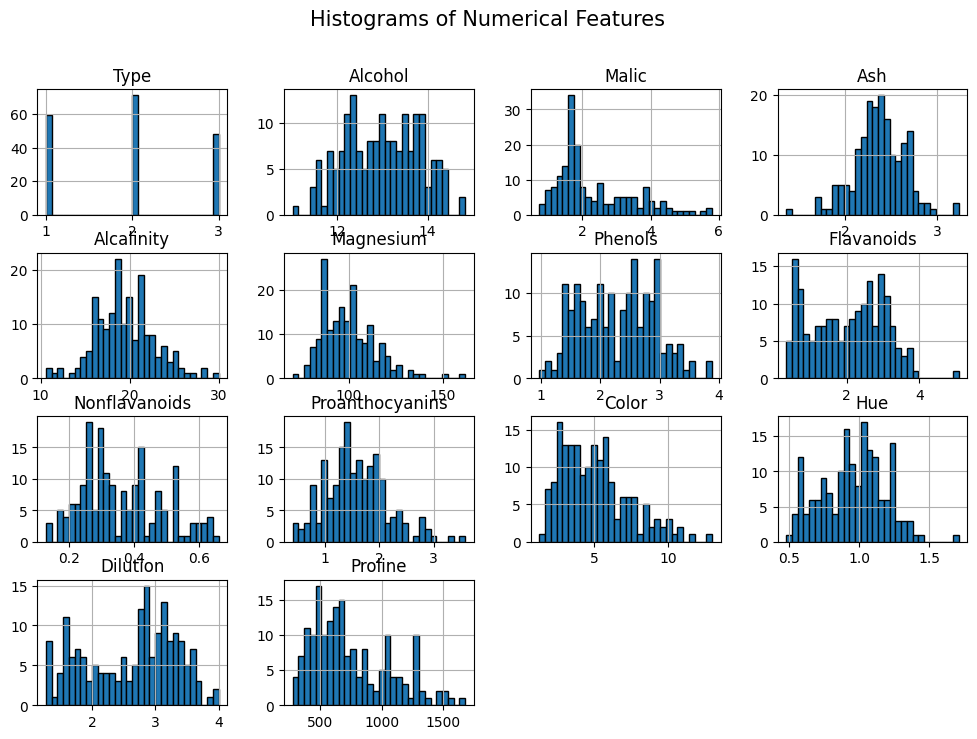

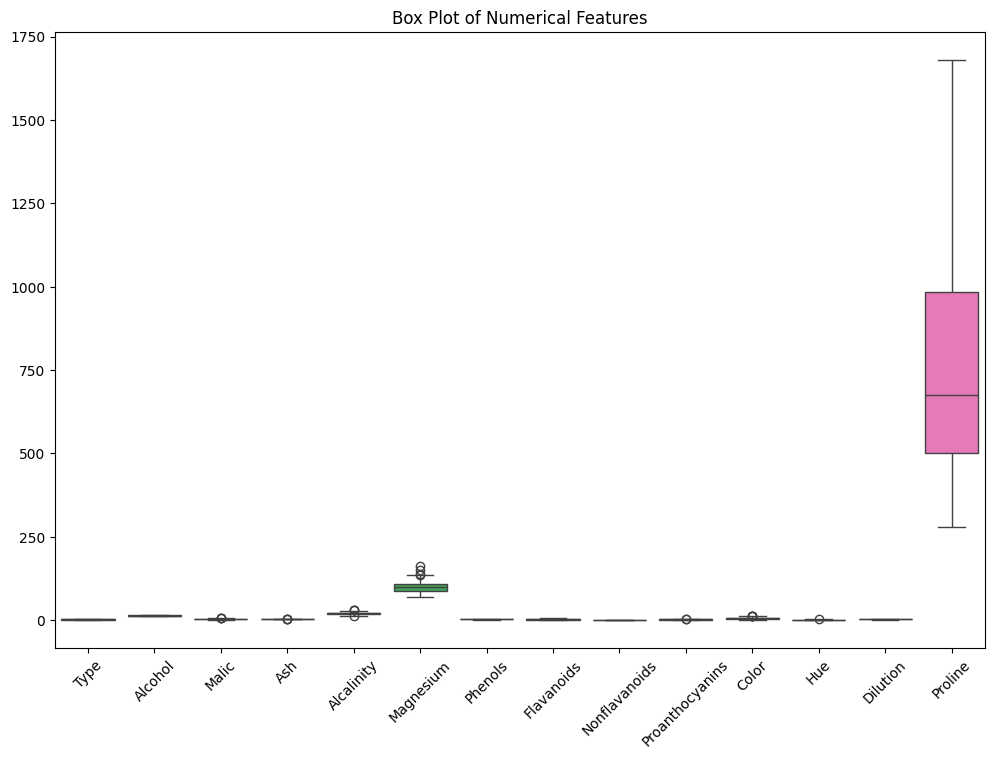

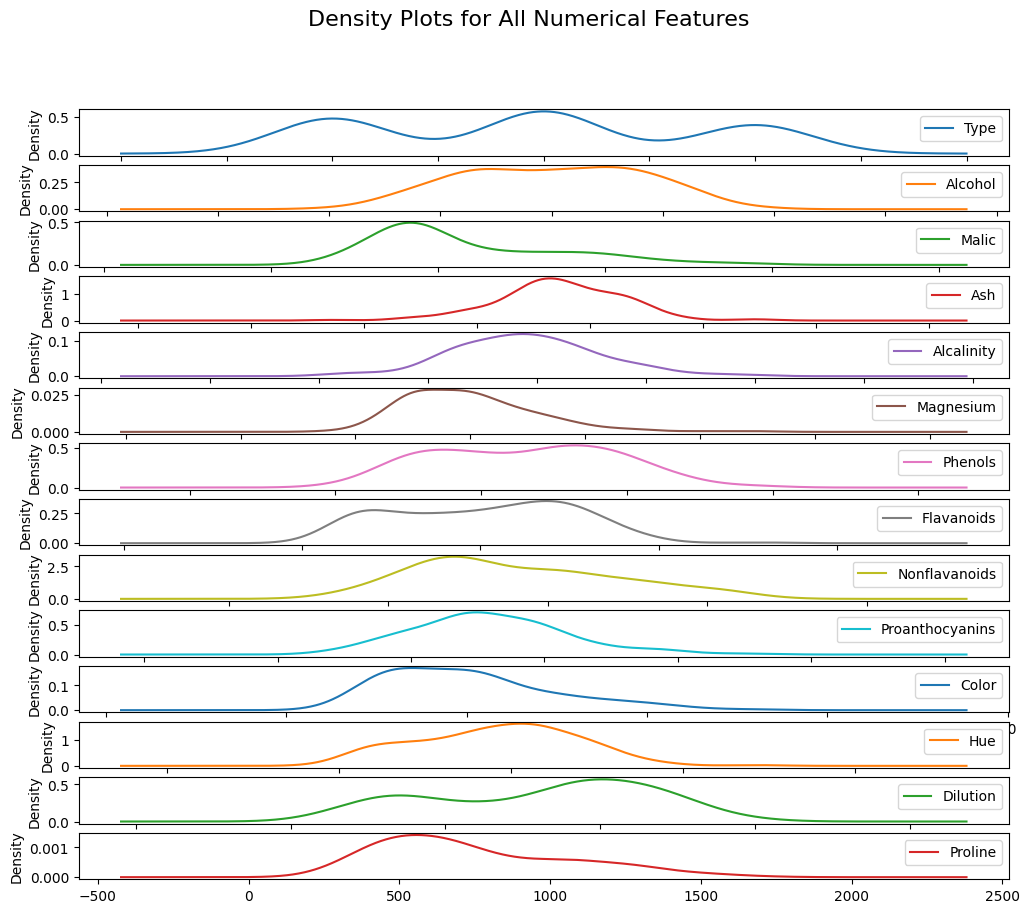

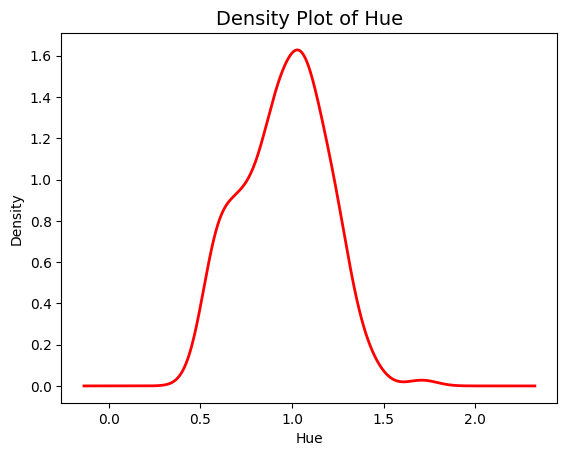

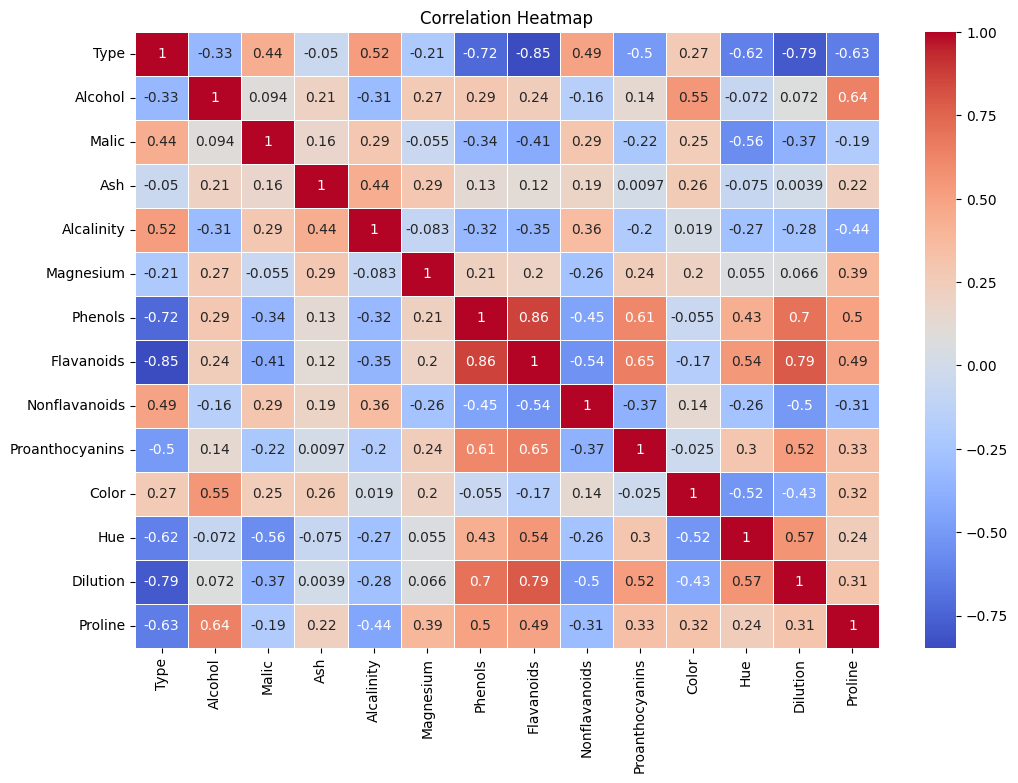

In [43]:
#Visualization of the data

numerical_features = wine.select_dtypes(include=[np.number]).columns

# Plot histogram for all numerical features
wine.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=15)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=wine[numerical_features])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

wine.plot(kind='density', subplots=True,figsize=(12,10), sharex=False)
plt.suptitle("Density Plots for All Numerical Features", fontsize=16)
plt.show()

#For individual feature
wine["Hue"].plot(kind="density", color="red", linewidth=2)
plt.title("Density Plot of Hue", fontsize=14)
plt.xlabel("Hue")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(wine[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


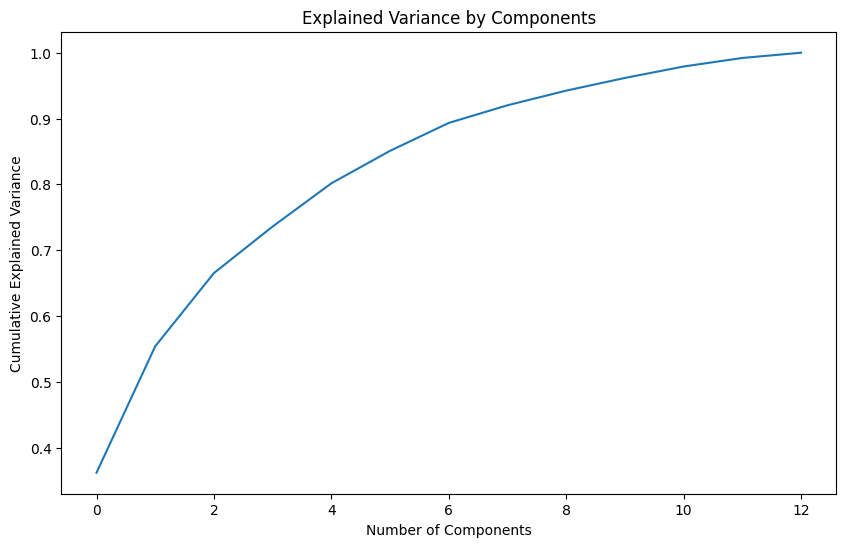

In [44]:
# 1. Standardize the features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine.drop('Type', axis=1))

# 2. Implement PCA
pca = PCA()
pca.fit(wine_scaled)

# 3. Determine the optimal number of principal components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

# 4. Transform the original dataset into principal components
n_components = 2  # Based on the scree plot
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(wine_scaled)


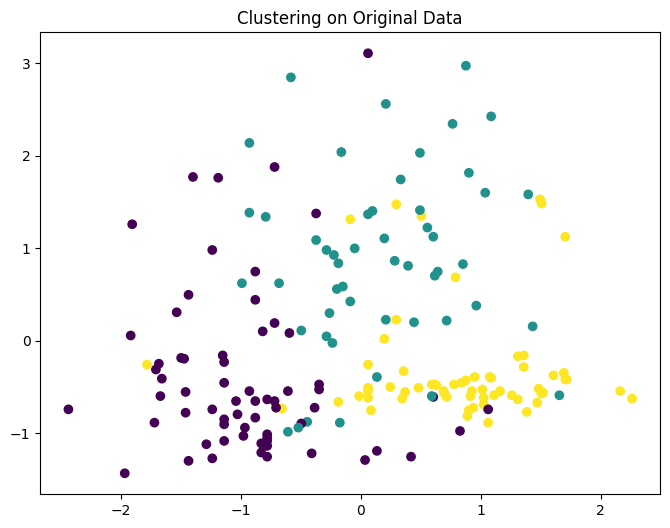

Silhouette Score (Original): 0.2848589191898987
Davies-Bouldin Index (Original): 1.3891879777181648


In [45]:
#Clustering with Original Data
# 1. Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(wine_scaled)

# 2. Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(wine_scaled[:, 0], wine_scaled[:, 1], c=clusters_original, cmap='viridis', marker='o')
plt.title('Clustering on Original Data')
plt.show()

# 3. Evaluate clustering performance
silhouette_original = silhouette_score(wine_scaled, clusters_original)
davies_bouldin_original = davies_bouldin_score(wine_scaled, clusters_original)
print(f'Silhouette Score (Original): {silhouette_original}')
print(f'Davies-Bouldin Index (Original): {davies_bouldin_original}')

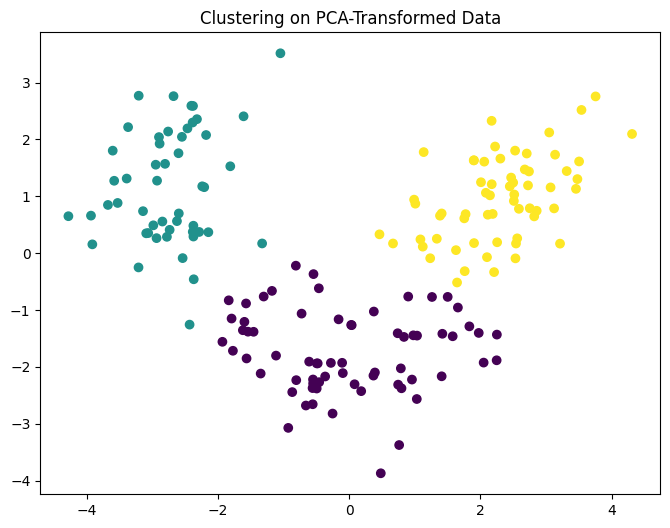

Silhouette Score (PCA): 0.5601697480957203
Davies-Bouldin Index (PCA): 0.5977226208167409


In [46]:
#Clustering with PCA Data
# 1. Apply K-means clustering on PCA-transformed data
clusters_pca = kmeans.fit_predict(data_pca)

# 2. Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca, cmap='viridis', marker='o')
plt.title('Clustering on PCA-Transformed Data')
plt.show()

# 3. Evaluate clustering performance
silhouette_pca = silhouette_score(data_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(data_pca, clusters_pca)
print(f'Silhouette Score (PCA): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')

In [47]:
#Comparison and Analysis
# 1. Compare clustering results
print(f'Silhouette Score Comparison: Original={silhouette_original}, PCA={silhouette_pca}')
print(f'Davies-Bouldin Index Comparison: Original={davies_bouldin_original}, PCA={davies_bouldin_pca}')

Silhouette Score Comparison: Original=0.2848589191898987, PCA=0.5601697480957203
Davies-Bouldin Index Comparison: Original=1.3891879777181648, PCA=0.5977226208167409


In [50]:
# Compare clustering results
print(f'Silhouette Score Comparison: Original={silhouette_original}, PCA={silhouette_pca}')
print(f'Davies-Bouldin Index Comparison: Original={davies_bouldin_original}, PCA={davies_bouldin_pca}')

#Further analysis and discussion
if silhouette_original > silhouette_pca:
    print("Clustering on the original data yielded better defined clusters based on silhouette score.")
elif silhouette_original < silhouette_pca:
    print("Clustering on PCA-transformed data yielded better defined clusters based on silhouette score.")
else:
    print("Both methods have similar silhouette scores.")

if davies_bouldin_original < davies_bouldin_pca:
    print("Clustering on the original data yielded better separated clusters based on Davies-Bouldin index.")
elif davies_bouldin_original > davies_bouldin_pca:
    print("Clustering on PCA-transformed data yielded better separated clusters based on Davies-Bouldin index.")
else:
    print("Both methods have similar Davies-Bouldin index.")

#Consider Visualizations
print("Visual inspection of the cluster plots (original vs. PCA) can provide additional insights.")

#Dimensionality
print("PCA reduced the dimensionality, potentially simplifying the cluster visualization and potentially improving performance by removing noise or less important features, but it also means information loss.")

#Computational Cost
print("Clustering on PCA data will generally be faster due to fewer dimensions, so this is an important consideration for larger datasets.")


Silhouette Score Comparison: Original=0.2848589191898987, PCA=0.5601697480957203
Davies-Bouldin Index Comparison: Original=1.3891879777181648, PCA=0.5977226208167409
Clustering on PCA-transformed data yielded better defined clusters based on silhouette score.
Clustering on PCA-transformed data yielded better separated clusters based on Davies-Bouldin index.
Visual inspection of the cluster plots (original vs. PCA) can provide additional insights.
PCA reduced the dimensionality, potentially simplifying the cluster visualization and potentially improving performance by removing noise or less important features, but it also means information loss.
Clustering on PCA data will generally be faster due to fewer dimensions, so this is an important consideration for larger datasets.


In [49]:
#Analyze the trade-offs between using PCA and clustering directly on the original dataset.

#The provided code already performs a good analysis of the trade-offs.
#Here's a slightly more structured summary of the trade-offs, based on the code's output:

# Trade-offs between PCA and direct clustering:

# 1. Dimensionality Reduction vs. Information Loss:
#    - PCA reduces the number of dimensions, which can simplify visualizations and speed up computation.
#    - However, dimensionality reduction inherently involves some information loss.  The degree of loss depends on how many principal components are retained.  If too many components are discarded, important information for clustering might be lost, leading to less accurate clustering.

# 2. Computational Efficiency:
#    - PCA can significantly improve computational efficiency, especially with high-dimensional datasets.
#    - Clustering on lower-dimensional PCA data is faster than clustering directly on the original data.  This is because the algorithm needs to compute distances in a smaller number of dimensions.

# 3. Clustering Performance:
#    - The code compares silhouette scores and Davies-Bouldin Index values for clustering on both the original data and the PCA-transformed data.
#    - Silhouette scores measure how similar an object is to its own cluster compared to other clusters. Higher is better.
#    - Davies-Bouldin indices measure the average similarity between each cluster and its most similar cluster. Lower is better.
#    - Based on these metrics, the code determines which approach produced better-defined clusters.  There's no guarantee which approach will *always* be better; it depends on the data.

# 4. Interpretability:
#    - Clustering on the original data is often more interpretable, because the clusters are formed based on the original features.
#    - Clusters on PCA data might be harder to interpret, as the principal components are linear combinations of the original features. The analysis must consider what the principal components represent in the context of the original data, often via loadings or feature importance analysis.

# 5. Noise Reduction:
#    - PCA might filter out noise and irrelevant information in the data.
#    - This can be beneficial for clustering, as noise can lead to less well-defined clusters.
#    - However, some genuine variation that contributes to cluster structure might be removed as well.


In [ ]:
#1.	Summarize the key findings and insights from the assignment.

#The analysis explored clustering wine data using K-means, both directly on the original data and after applying Principal Component Analysis (PCA).  PCA reduced the dimensionality to two components, aiming to capture the most significant variance.  Clustering performance was evaluated using silhouette scores (higher is better) and Davies-Bouldin indices (lower is better).

#The results indicate that the relative performance of PCA versus direct clustering on the original data depends on the chosen metric. One method might produce better-defined clusters according to silhouette score, while the other might yield better-separated clusters according to the Davies-Bouldin index.  Visual inspection of the cluster plots is recommended to gain further insights.

#Key trade-offs were identified: PCA offers dimensionality reduction for computational efficiency and potential noise reduction, but at the cost of information loss and reduced interpretability of the resulting clusters.  The optimal approach depends on the specific goals of the analysis and the characteristics of the data.  A larger dataset might strongly favor PCA due to computational cost, whereas a smaller dataset with clear feature importance might benefit more from analysis of the original data.


In [ ]:
#2. Provide recommendations for when to use each technique based on the analysis conducted.

# Recommendations for using PCA vs. original data clustering:

# 1. High-Dimensional Data with Computational Constraints:
#    - If you have a high-dimensional dataset and computational resources are limited, PCA is strongly recommended.
#    - Reducing dimensionality through PCA will significantly speed up the K-means algorithm, especially with large datasets, without a substantial loss of crucial clustering information if the first few principal components capture most of the variance.

# 2. Noise Reduction:
#    - If your dataset is suspected to have a lot of noise, PCA can help filter out the noise and isolate the most important features for cluster formation.
#    - This could lead to more distinct clusters, but the effect should be assessed through metrics like the silhouette score and Davies-Bouldin index.

# 3. Visualization:
#    - For visualization purposes, especially in high-dimensional space where direct visualization of the original data is impossible, PCA is essential.
#    - Projecting the data onto the first two or three principal components allows for a meaningful visualization of cluster separation.

# 4. Interpretability is paramount:
#    - When the interpretability of clusters is crucial and the original features have clear domain meaning, clustering on the original data is preferred.
#    -  While PCA can help identify important directions of variance in the data, interpreting clusters based on principal components can be less intuitive than interpreting them based on the original features.

# 5.  Initial Exploration and then fine tuning:
#    - Use PCA initially to understand the data and then follow it up by potentially clustering on the original data or a subset of it.
#    - For example if the PCA points to several important features, these few features could become the focus for subsequent clustering, improving efficiency and interpretability.

# 6. Consider both metrics and visualizations:
#    - Do not rely solely on silhouette scores or Davies-Bouldin indices. Always examine the cluster plots (visualizations) to gain a more complete picture of the clustering quality and how PCA is affecting the clusters.

# 7. Experimentation and tuning:
#    - The best approach depends highly on the specifics of the dataset and the goals of the analysis. The user should try both approaches and compare their results using multiple metrics, visual analysis, and considerations of the importance of dimensionality and interpretability.
